<img src="https://raw.githubusercontent.com/dasdebjeet/data_science/74c7b929664a7e6757de30a1c7769b7398f99851/kaggle_practice/layoff-data/EDA_notebook_banner.png" style="width:100%">

<strong>Google, Microsoft, Amazon and other tech companies have laid off more than 70,000 employees in the last year
The job cuts in tech land are piling up, as companies that led the 10-year bull market adapt to a new reality.<br><br>
Google announced plans to lay off 12,000 people from its workforce Friday, while Microsoft said Wednesday that it’s letting go of 10,000 employees. Amazon also began a fresh round of job cuts that are expected to eliminate more than 18,000 employees and become the largest workforce reduction in the e-retailer’s 28-year history.
The layoffs come in a period of slowing growth, higher interest rates to battle inflation, and fears of a possible recession next year.</strong><br><br>

<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border:5px solid #4AD3FF"> Table of Contents</h2>

1. [Import necessary Libaries](#imports)
2. [Read the Dataset](#dataset)<br>
    2.1. [Dataset Description](#dataset_des)
3. [Data Exploration](#data_expo)
4. [Feature Enginnering](#feat_eng)
5. [Data Cleaning](#data_clean)
6. [Data Analysis](#data_ana)<br>
    6.1. [Visualize the number Layoffs in these Years](#v1)<br>
    6.2. [Get the insights of the Layoffs groupby to their Continents](#insi1)<br>
    6.3. [Lets, visualize these countries](#v2)<br>
    6.4. [Get the insights of the company with 100% layoff rate](#insi2)<br>
    6.5. [Visualize the locations of tthe companies with 100% layoff rate](#geoloc)<br>
    6.6. [Divide the dataframe into 4 Groups](#divide_4grp)<br>
    6.6.1 [Visualize the different types of Industries in the Group 4](#v3)<br>
    6.6.2 [Lets, see the Top 10 companies with the most layoffs in the group 4 (154-11000 layoff count)](#insi3)<br>
    6.6.2a [Visualize the Top10 Layoff Count and Location](#v4)<br>
    6.6.2b [Visualize the Top16 Companies Location](#v5)<br>
    6.6.2c [Visualize the Top10 Layoff Companies Funds Raised](#v6)<br>
7. [Conclusion](#conclusion)

<a id="imports"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">1. Import necessary Libaries</h2>

In [78]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly_express as px

import seaborn as sns

palette = sns.color_palette("rainbow", 8)

<a id="dataset"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">2. Read the Dataset</h2>

In [2]:
df = pd.read_csv("./layoffs_data.csv")
df.head().style.set_properties(**{'background-color': '#E1F8FF','color': '#000','border': '1px solid #4AD3FF'})

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Wix,Tel Aviv,Marketing,370.000000,0.060000,2023-02-15 00:00:00,https://www.calcalistech.com/ctechnews/article/s1lsqn5as,58.000000,Post-IPO,2023-02-15 21:00:06,Israel,Unknown
1,Neon,Sao Paulo,Finance,210.000000,0.090000,2023-02-15 00:00:00,https://www.seudinheiro.com/2023/empresas/unicornio-neon-banco-digital-demissao-em-massa-lils/,720.000000,Series D,2023-02-15 21:58:53,Brazil,https://docs.google.com/spreadsheets/d/1HPjbndRJEq8OppLnQ17gjLKWGTLDCihH88KJ3ERr_10/htmlview#gid=0
2,DigitalOcean,New York City,Infrastructure,200.000000,0.110000,2023-02-15 00:00:00,https://www.theregister.com/2023/02/15/digitalocean_layoffs/,491.000000,Post-IPO,2023-02-15 22:55:04,United States,Unknown
3,Sprinklr,New York City,Support,100.000000,0.040000,2023-02-15 00:00:00,https://techcrunch.com/2023/02/15/sprinklr-layoffs-2023/,429.000000,Post-IPO,2023-02-15 19:05:49,United States,Unknown
4,Milkrun,Sydney,Food,nan,0.200000,2023-02-15 00:00:00,https://www.smh.com.au/technology/milkrun-slashes-workforce-closes-delivery-hubs-in-cash-crunch-20230215-p5ckny.html,86.000000,Series A,2023-02-15 19:04:56,Australia,Unknown


<a id="dataset_des"></a>
<h3 style="background-color:#E1F8FF; margin-bottom:0px;padding:10px; color:#000">2.1 Dataset Description</h3>

1. Company - Name of the Company
2. Location - Location of the Company
3. Industry - Type of Industry the company is
4. Laid_Off_Count - Total count
5. Percentage - Percentage of layoff
6. Date - Date of layoff
7. Source - Data gathered from source
8. Funds_Raised - Total funds raised
9. Stage - Stage of the company
10. Date_Added - data added in database
11. Country - Country of company located
12. List_of_Employees_Laid_Off - link to g_docs of employee list

In [3]:
df.shape

(2252, 12)

<a id="data_expo"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">3. Data Exploration</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252 entries, 0 to 2251
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2252 non-null   object 
 1   Location_HQ                 2252 non-null   object 
 2   Industry                    2252 non-null   object 
 3   Laid_Off_Count              1546 non-null   float64
 4   Percentage                  1517 non-null   float64
 5   Date                        2251 non-null   object 
 6   Source                      2252 non-null   object 
 7   Funds_Raised                2055 non-null   float64
 8   Stage                       2252 non-null   object 
 9   Date_Added                  2252 non-null   object 
 10  Country                     2252 non-null   object 
 11  List_of_Employees_Laid_Off  2251 non-null   object 
dtypes: float64(3), object(9)
memory usage: 211.2+ KB


In [5]:
df.isna().sum()

Company                         0
Location_HQ                     0
Industry                        0
Laid_Off_Count                706
Percentage                    735
Date                            1
Source                          0
Funds_Raised                  197
Stage                           0
Date_Added                      0
Country                         0
List_of_Employees_Laid_Off      1
dtype: int64

In [6]:
df.shape

(2252, 12)

In [7]:
df.describe()

,Laid_Off_Count,Percentage,Funds_Raised
count,1546.000000,1517.000000,2055.000000
mean,234.755498,0.258607,817.473623
std,757.824391,0.255065,5701.925802
min,3.000000,0.000000,0.000000
25%,35.000000,0.100000,48.000000
50%,76.500000,0.170000,152.000000
75%,164.000000,0.300000,426.000000
max,12000.000000,1.000000,121900.000000


<a id="feat_eng"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">4. Feature Engineering</h2>

Now, lets create a new column named 'year_of_laidoff' which will tell us on which layoff happend

In [11]:
def get_date():
    year_list = []
    
    col = df['Date_Added']
    for i in range(len(col)):
        date = col[i]
        year = col[i].split("-", 1)[0]
        year_list.append(year)
        # break
    return year_list

layoff_year_list = get_date()

In [12]:
df['year_of_laidOff'] = layoff_year_list

<a id="data_clean"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">5. Data Cleaning</h2>

<br>
Lets, with some cleanup...<br>
We don't need the Source(data gathered from source), Date_Added(data added in database), and List_of_Employees_Laid_Off - link to g_docs of employee list

In [13]:
df.drop(['Source', 'Date_Added', 'List_of_Employees_Laid_Off'], axis=1, inplace=True)

<br>Drop the rows which Layoff count NAN, we don't need those rows

In [14]:
df = df[df['Laid_Off_Count'].notna()]

In [15]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,year_of_laidOff
0,Wix,Tel Aviv,Marketing,370.0,0.06,2023-02-15 00:00:00,58.0,Post-IPO,Israel,2023
1,Neon,Sao Paulo,Finance,210.0,0.09,2023-02-15 00:00:00,720.0,Series D,Brazil,2023
2,DigitalOcean,New York City,Infrastructure,200.0,0.11,2023-02-15 00:00:00,491.0,Post-IPO,United States,2023
3,Sprinklr,New York City,Support,100.0,0.04,2023-02-15 00:00:00,429.0,Post-IPO,United States,2023
6,CommerceHub,Albany,Retail,371.0,0.31,2023-02-14 00:00:00,NaN,Acquired,United States,2023


<a id="data_ana"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">6. Data Analytics</h2>

<a id="v1"></a>
<h3 style="background-color:#E1F8FF; margin-bottom:0px;padding:10px; color:#000">6.1. Visualize the number Layoffs in these Years</h3>

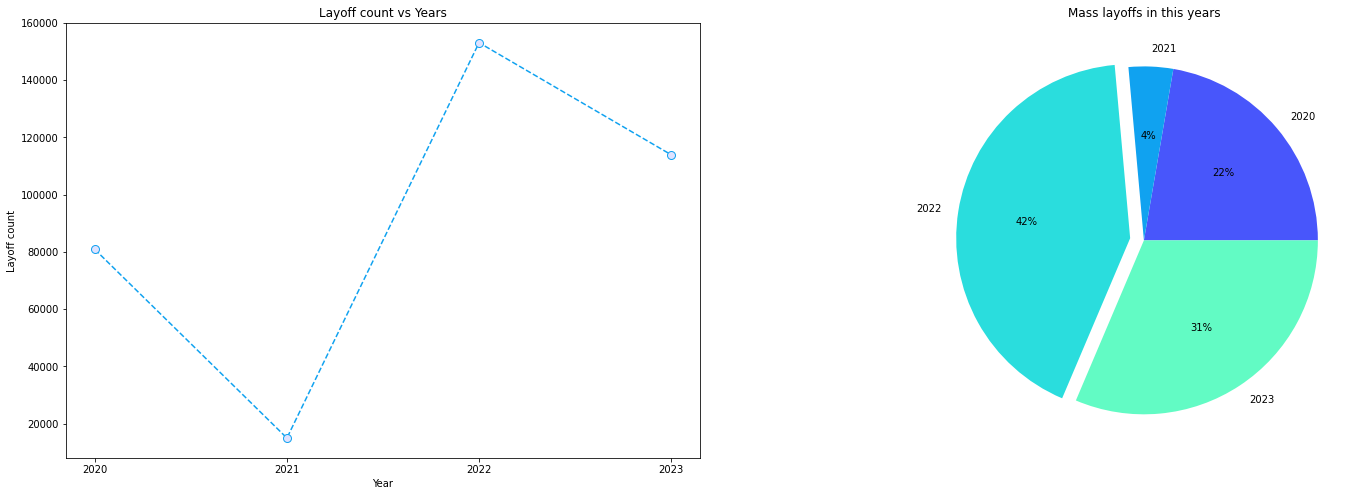

In [16]:
plt.figure(figsize=(25, 8))
laidOff_countYear = df.groupby('year_of_laidOff', as_index=False).sum()

plt.subplot(1, 2, 1)

plt.plot(laidOff_countYear['year_of_laidOff'], laidOff_countYear['Laid_Off_Count'], marker="o", linestyle='--', color='#10a2f0', 
         markerfacecolor='#dfe2ff', markersize=8)
plt.xlabel('Year'), plt.ylabel('Layoff count')
plt.title("Layoff count vs Years")

plt.subplot(1, 2, 2)

plt.pie(data=laidOff_countYear, x=laidOff_countYear['Laid_Off_Count'], labels=laidOff_countYear['year_of_laidOff'], autopct='%.f%%',
        explode = [0, 0, 0.08, 0], colors=palette)
plt.title("Mass layoffs in this years")

plt.show()

<a id="insi1"></a>
<h3 style="background-color:#E1F8FF; margin-bottom:0px;padding:10px; color:#000">6.2. Get the insights of the layoffs groupby to their Continents</h3>

In [17]:
laidOff_countByCountry = df.groupby('Country', as_index=False).sum()

In [18]:
asia = ['China', 'Hong Kong', 'India', 'Indonesia', 'Malaysia', 'Myanmar', 'Singapore', 'Thailand', 'United Arab Emirates', 'Israel']
europe = ['Austria', 'Bulgaria','Denmark', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', 'Luxembourg', 'Norway', 
          'Poland', 'Portugal', 'Romania', 'Russia', 'Sweden', 'Switzerland', 'Netherlands', 'United Kingdom']

n_america = ['Canada', 'Mexico', 'United States']
s_america = ['Argentina', 'Brazil', 'Chile', 'Colombia']

africa = ['Estonia', 'Kenya', 'Nigeria', 'Senegal', 'Seychelles']
oceania = ['Australia', 'New Zealand']

In [19]:
asia_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(asia)]
europe_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(europe)]

nAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(n_america)]
sAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(s_america)]

africa_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(africa)]
oceania_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(oceania)]

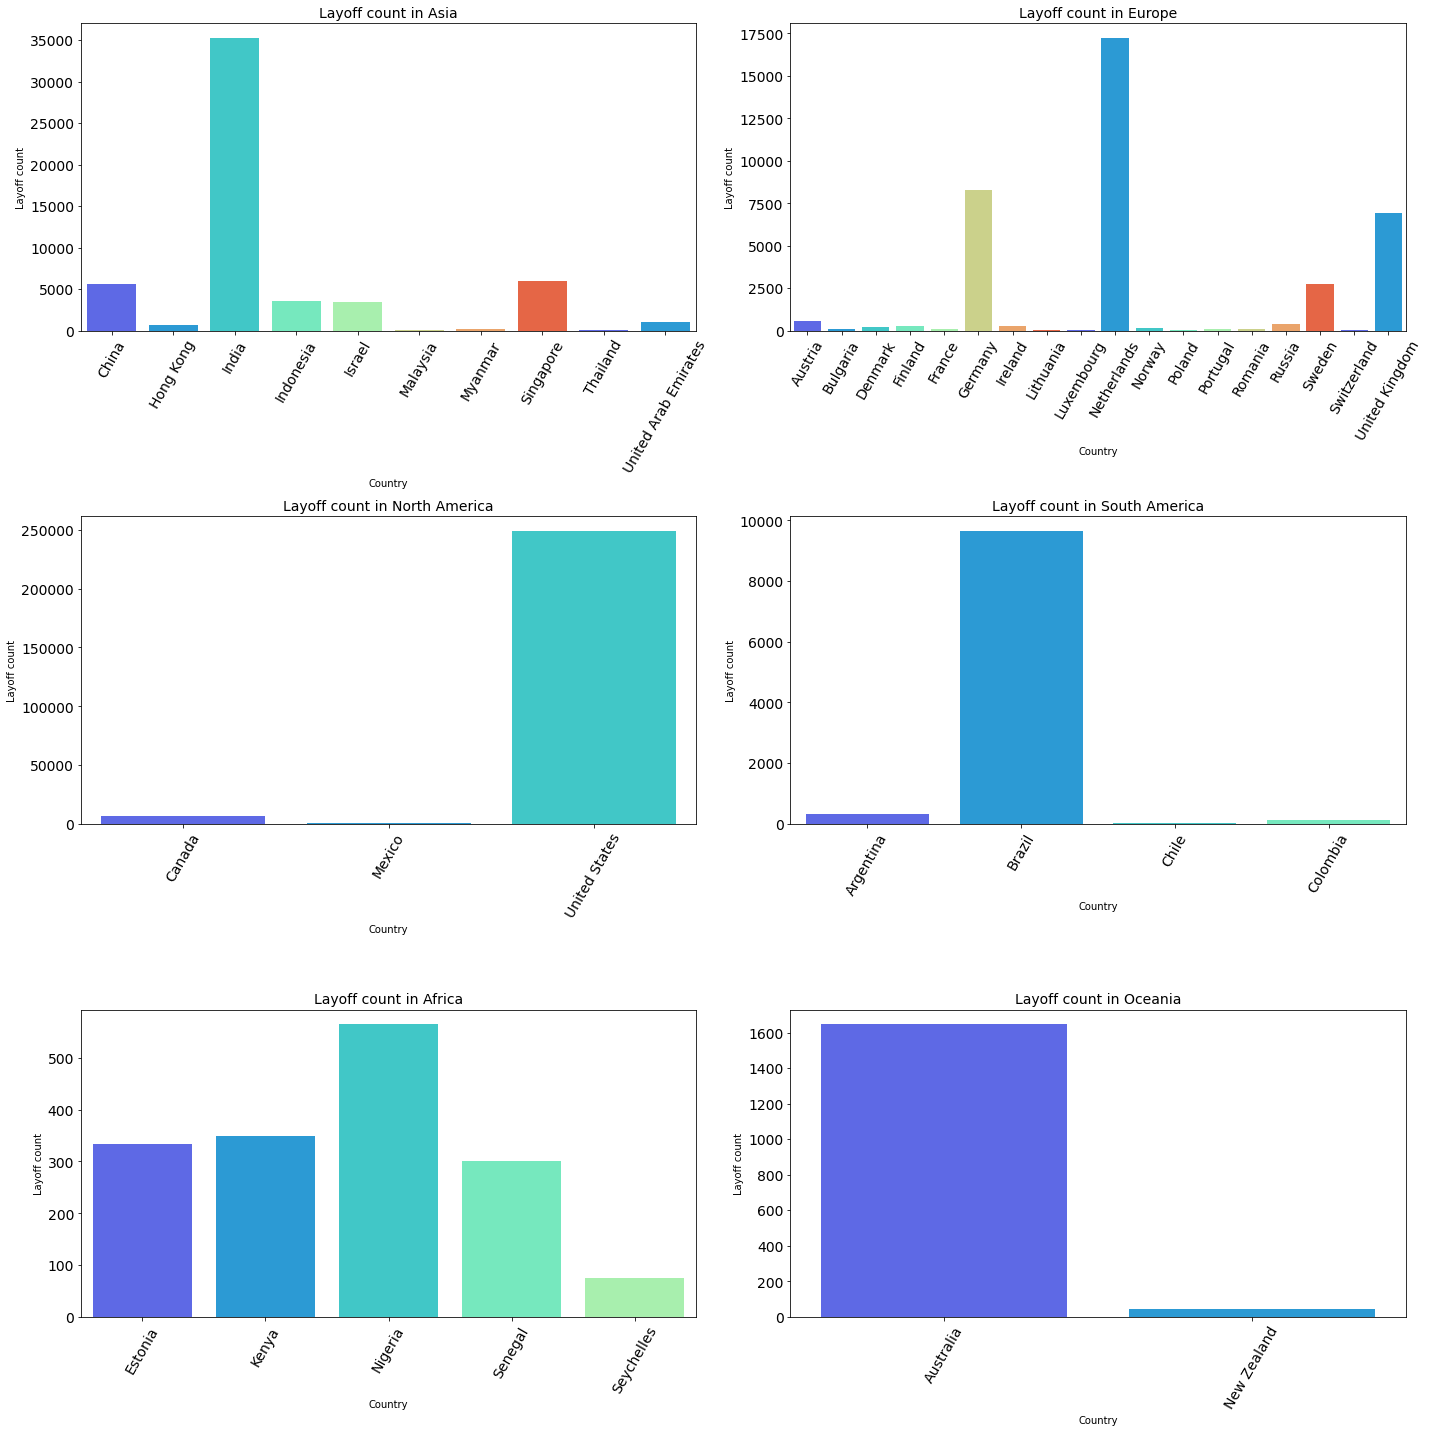

In [20]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.barplot(data=asia_insight, y=asia_insight['Laid_Off_Count'], x=asia_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Asia", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 2)
sns.barplot(data=europe_insight, y=europe_insight['Laid_Off_Count'], x=europe_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Europe", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 3)
sns.barplot(data=nAmerica_insight, y=nAmerica_insight['Laid_Off_Count'], x=nAmerica_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in North America", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 4)
sns.barplot(data=sAmerica_insight, y=sAmerica_insight['Laid_Off_Count'], x=sAmerica_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in South America", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 5)
sns.barplot(data=africa_insight, y=africa_insight['Laid_Off_Count'], x=africa_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Africa", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 6)
sns.barplot(data=oceania_insight, y=oceania_insight['Laid_Off_Count'], x=oceania_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Oceania", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

so, from the above visualization we can see that ***India, Germany, Netherlands, Sweden, United Kingdom, United States, Nigeria, and Australia*** are the countries to get most of the layoffs


<a id="v2"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">6.3. Lets, visualize these countries</h2>

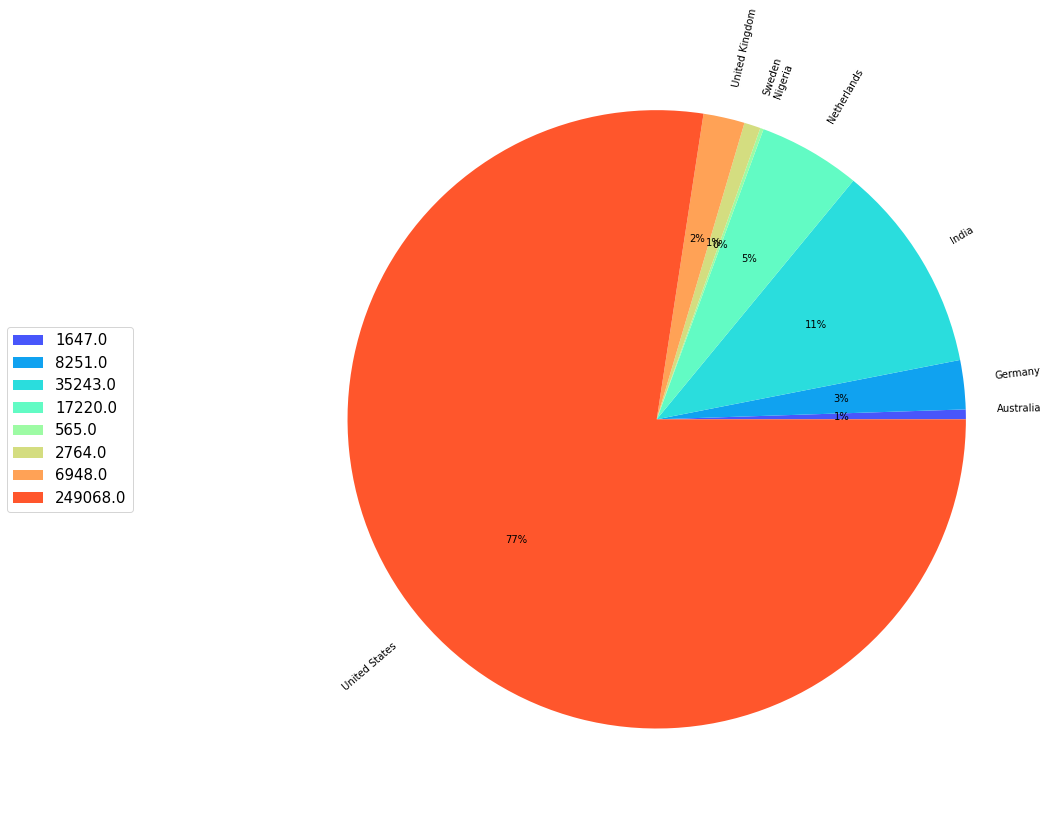

In [21]:
mass_layoff_countries_list = ['India', 'Germany', 'Netherlands', 'Sweden', 'United Kingdom', 'United States', 'Nigeria', 'Australia']

mass_layoff_countries = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(mass_layoff_countries_list)]

plt.figure(figsize=(15, 20))
plt.pie(data=mass_layoff_countries, x=mass_layoff_countries['Laid_Off_Count'], labels=mass_layoff_countries['Country'],
        autopct='%.f%%', colors=palette, rotatelabels=True, wedgeprops = {'linewidth': 3})
plt.legend(mass_layoff_countries['Laid_Off_Count'], loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=15)
plt.xticks(fontsize=50), plt.yticks(fontsize=50)
plt.tight_layout()
plt.show()

<a id="insi2"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">6.4. Get the insights of the company with <strong>100% layoff rate</strong> </h2>

In [22]:
insight_1 = df.loc[df['Percentage'] == 1.00].dropna()
insight_1.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,year_of_laidOff
49,Openpay,Melbourne,Finance,83.0,1.0,2023-02-07 00:00:00,299.0,Post-IPO,Australia,2023
240,Britishvolt,London,Transportation,206.0,1.0,2023-01-17 00:00:00,2400.0,Unknown,United Kingdom,2023
598,Deliveroo Australia,Melbourne,Food,120.0,1.0,2022-11-15 00:00:00,1700.0,Post-IPO,Australia,2022
682,Planetly,Berlin,Other,200.0,1.0,2022-11-04 00:00:00,5.0,Acquired,Germany,2022
729,Fifth Season,Pittsburgh,Food,100.0,1.0,2022-10-28 00:00:00,35.0,Series B,United States,2022


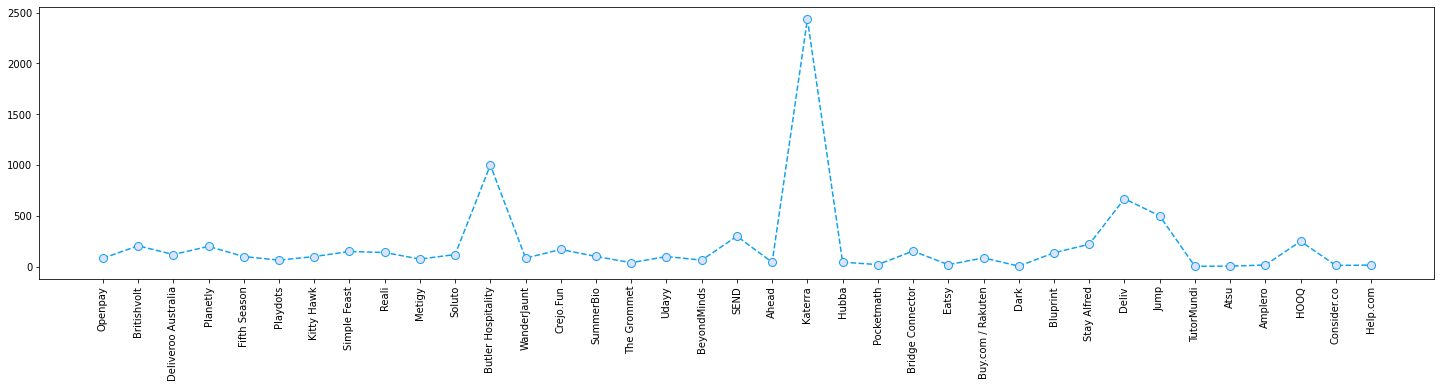

In [23]:
plt.figure(figsize=(25,5))

plt.plot(insight_1['Company'], insight_1['Laid_Off_Count'], marker="o", linestyle='--', color='#10a2f0', 
         markerfacecolor='#dfe2ff', markersize=8)
plt.xticks(rotation = 90)

plt.show()

<a id="geoloc_4grp"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px; padding:20px; color:#000; border-bottom:5px solid #4AD3FF">6.5. Visualize the locations of tthe companies with<strong> 100%  </strong> layoff rate</h2>

In [148]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="layoff_data")

for i in range(len(insight_1['Location_HQ'])):
    def find_lat(i):
        return geolocator.geocode(i).latitude
    
    def find_long(i):
        return geolocator.geocode(i).longitude
    
insight_1['latitude'] = insight_1['Location_HQ'].apply(find_lat)
insight_1['longitude'] = insight_1['Location_HQ'].apply(find_long)

insight_1 = insight_1.fillna(0)

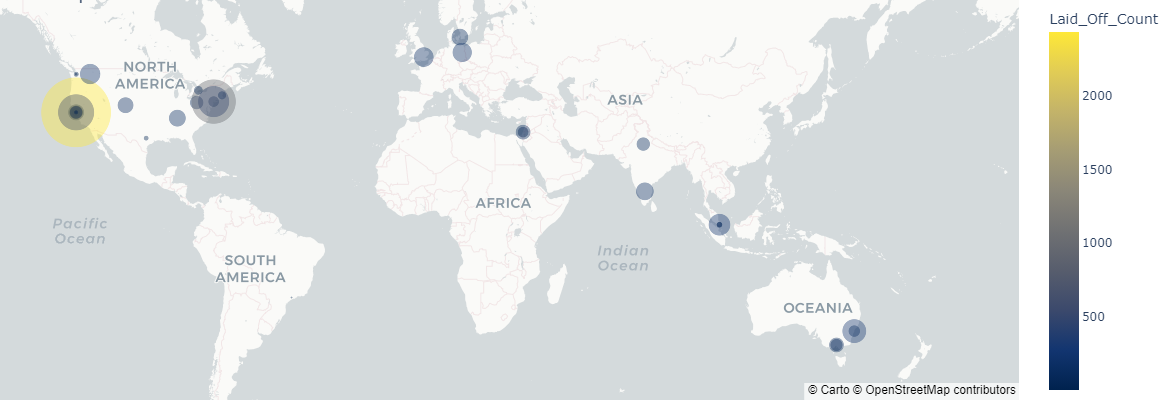

In [162]:
insight1_fig = px.scatter_mapbox(insight_1,lat='latitude',lon='longitude', hover_name='Location_HQ', hover_data=['Laid_Off_Count', "Company"], 
    color='Laid_Off_Count',color_continuous_scale=px.colors.sequential.Cividis,
    size="Laid_Off_Count", size_max=50, opacity=0.4,
    center={'lat':10, 'lon':30},
    zoom=1,
    height=400,width=1400,
    mapbox_style="carto-positron")
insight1_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
insight1_fig.update_layout(title_text="Population of each cities")
insight1_fig.show()

<a id="divide_4grp"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px; padding:20px; color:#000; border-bottom:5px solid #4AD3FF">6.6. Divide the dataframe into <strong>4 Groups</strong></h2>
So, we can divide the data into <strong>4 groups</strong> according to their <strong>Layoff count</strong> from 3-35, 35-73, 73-154, and 154-11000

In [150]:
grp1_insight = df.loc[(df['Laid_Off_Count'] <= 35)]
grp2_insight = df.loc[(df['Laid_Off_Count'] > 35) & (df['Laid_Off_Count'] <= 73)]
grp3_insight = df.loc[(df['Laid_Off_Count'] > 75) & (df['Laid_Off_Count'] <= 153)]
grp4_insight = df.loc[(df['Laid_Off_Count'] > 153)]

<a id="v3"></a>
<h4 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.6.1 Visualize the different types of Industries in the Group 4</h4>

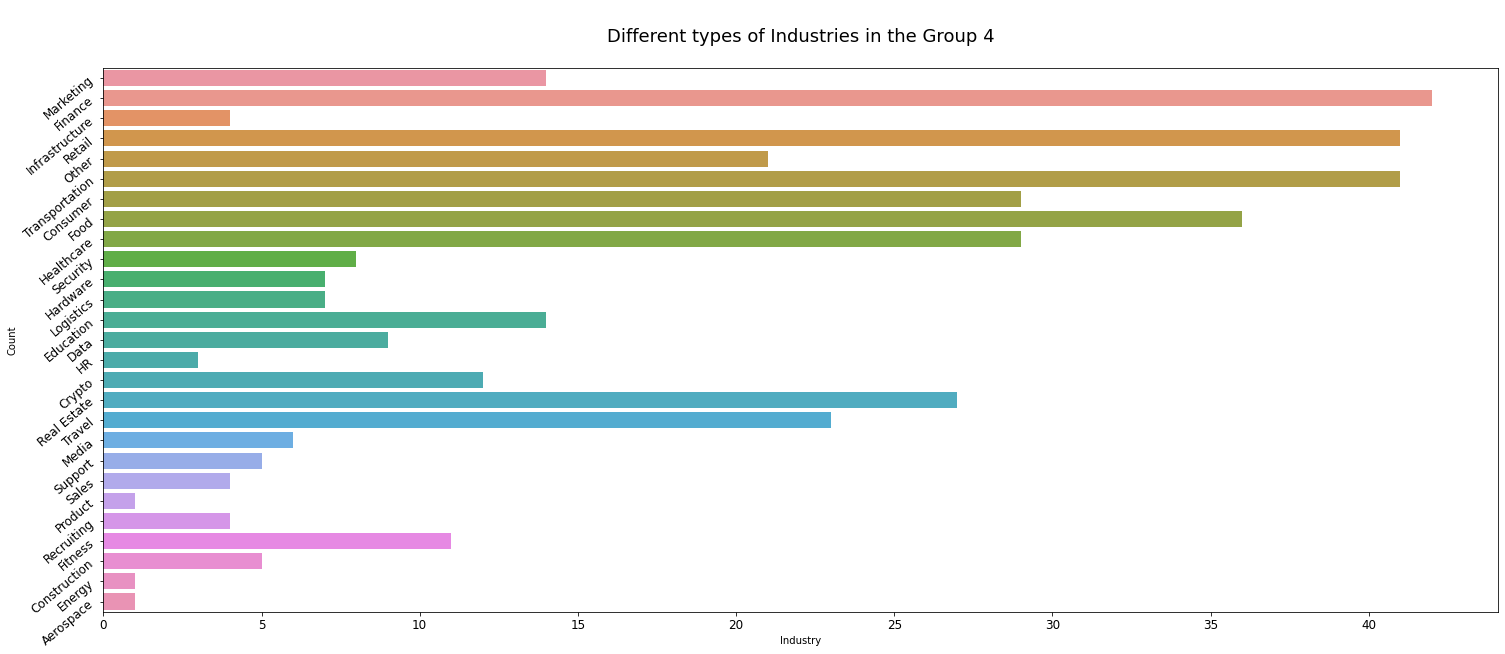

In [151]:
plt.figure(figsize=(25,10))

sns.countplot(y='Industry', data=grp4_insight)
plt.xlabel('Industry'), plt.ylabel('Count')
plt.xticks(fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nDifferent types of Industries in the Group 4\n", fontsize=18)

plt.show()

<a id="insi3"></a>
<h4 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.6.2 Lets, see the <strong>Top 10</strong> companies with the most layoffs in the group 4 (154-11000 layoff count)</h4>

In [152]:
top10_comp = grp4_insight.sort_values('Laid_Off_Count', ascending=False)
top10_comp = top10_comp.head(10)
top10_comp

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,year_of_laidOff
183,Google,SF Bay Area,Consumer,12000.0,0.06,2023-01-20 00:00:00,26.0,Post-IPO,United States,2023
648,Meta,SF Bay Area,Consumer,11000.0,0.13,2022-11-09 00:00:00,26000.0,Post-IPO,United States,2022
580,Amazon,Seattle,Retail,10000.0,0.03,2022-11-16 00:00:00,108.0,Post-IPO,United States,2022
215,Microsoft,Seattle,Other,10000.0,0.05,2023-01-18 00:00:00,1.0,Post-IPO,United States,2023
353,Amazon,Seattle,Retail,8000.0,0.02,2023-01-04 00:00:00,108.0,Post-IPO,United States,2023
354,Salesforce,SF Bay Area,Sales,8000.0,0.10,2023-01-04 00:00:00,65.0,Post-IPO,United States,2023
52,Dell,Austin,Hardware,6650.0,0.05,2023-02-06 00:00:00,NaN,Post-IPO,United States,2023
112,Philips,Amsterdam,Healthcare,6000.0,0.13,2023-01-30 00:00:00,NaN,Post-IPO,Netherlands,2023
1675,Booking.com,Amsterdam,Travel,4375.0,0.25,2020-07-30 00:00:00,NaN,Acquired,Netherlands,2020
581,Cisco,SF Bay Area,Infrastructure,4100.0,0.05,2022-11-16 00:00:00,2.0,Post-IPO,United States,2022


<a id="v4"></a>
<h5 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.6.2a Visualize the Top10 <strong>Layoff Count and Location</strong></h5>

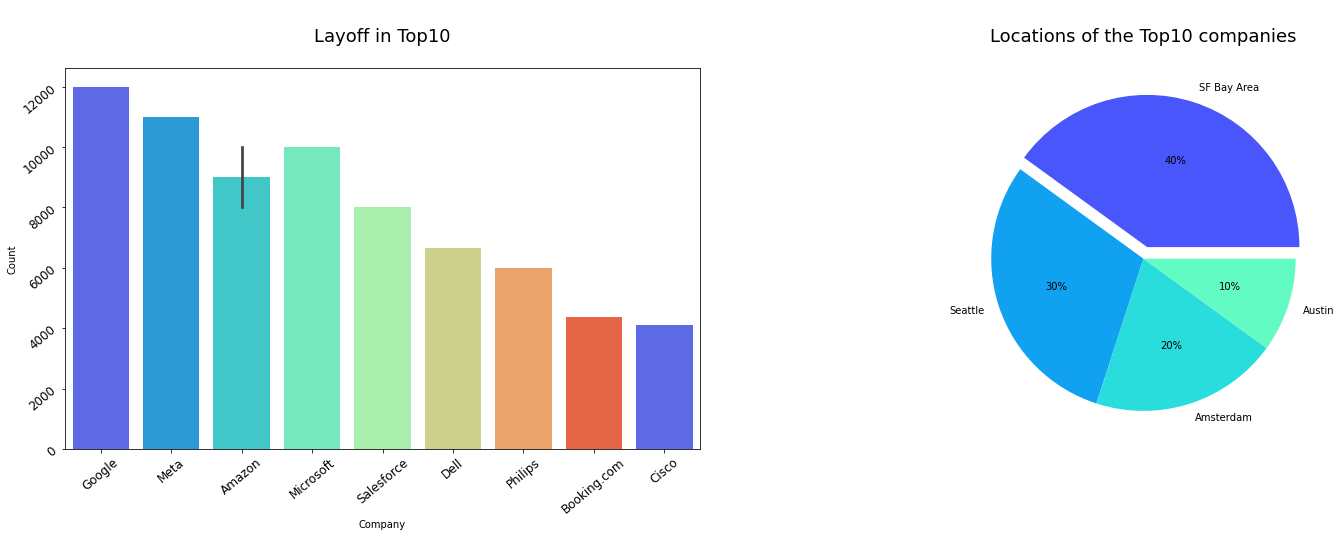

In [153]:
plt.figure(figsize=(25,7))

plt.subplot(1, 2, 1)
sns.barplot(data=top10_comp, x=top10_comp['Company'], y=top10_comp['Laid_Off_Count'], palette=palette)
plt.xlabel('Company'), plt.ylabel('Count')
plt.xticks(rotation=40, fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nLayoff in Top10\n", fontsize=18)

plt.subplot(1, 2, 2)
top10_comp_loca = top10_comp['Location_HQ'].value_counts()
plt.pie(data=top10_comp, x=top10_comp_loca.values, labels=top10_comp_loca.index, autopct='%.f%%',  explode = [0.08, 0, 0, 0], colors=palette)
plt.title("\nLocations of the Top10 companies\n", fontsize=18)

plt.show()

<a id="v5"></a>
<h5 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.6.2b Visualize the Top10 Companies <strong>Location</strong></h5>

In [154]:
for i in range(len(top10_comp['Location_HQ'])):
    def find_lat(i):
        return geolocator.geocode(i).latitude
    
    def find_long(i):
        return geolocator.geocode(i).longitude

In [155]:
top10_comp['latitude'] = top10_comp['Location_HQ'].apply(find_lat)
top10_comp['longitude'] = top10_comp['Location_HQ'].apply(find_long)

In [156]:
top10_comp = top10_comp.fillna(0)

In [157]:
top10_comp.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,year_of_laidOff,latitude,longitude
183,Google,SF Bay Area,Consumer,12000.0,0.06,2023-01-20 00:00:00,26.0,Post-IPO,United States,2023,37.788497,-122.355847
648,Meta,SF Bay Area,Consumer,11000.0,0.13,2022-11-09 00:00:00,26000.0,Post-IPO,United States,2022,37.788497,-122.355847
580,Amazon,Seattle,Retail,10000.0,0.03,2022-11-16 00:00:00,108.0,Post-IPO,United States,2022,47.603832,-122.330062
215,Microsoft,Seattle,Other,10000.0,0.05,2023-01-18 00:00:00,1.0,Post-IPO,United States,2023,47.603832,-122.330062
353,Amazon,Seattle,Retail,8000.0,0.02,2023-01-04 00:00:00,108.0,Post-IPO,United States,2023,47.603832,-122.330062


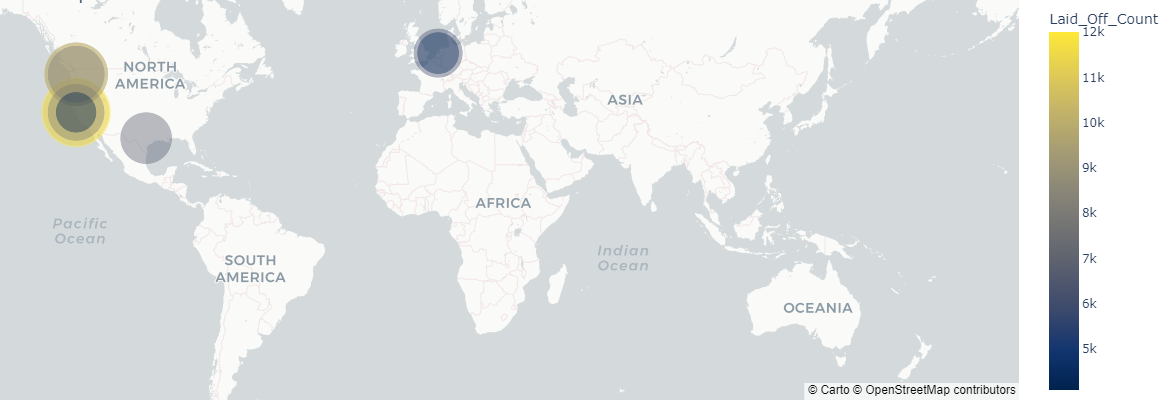

In [161]:
top10_comp_fig = px.scatter_mapbox(top10_comp,lat='latitude',lon='longitude', hover_name='Location_HQ', hover_data=['Laid_Off_Count', "Company"], 
    color='Laid_Off_Count',color_continuous_scale=px.colors.sequential.Cividis,
    size="Laid_Off_Count", size_max=50, opacity=0.4,
    center={'lat':10, 'lon':30},
    zoom=1,
    height=400,width=1400,
    mapbox_style="carto-positron")
top10_comp_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
top10_comp_fig.update_layout(title_text="Population of each cities")
top10_comp_fig.show()

<a id="v6"></a>
<h5 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.6.2c Visualize the Top10 Layoff Companies <strong>Funds Raised</strong></h5>

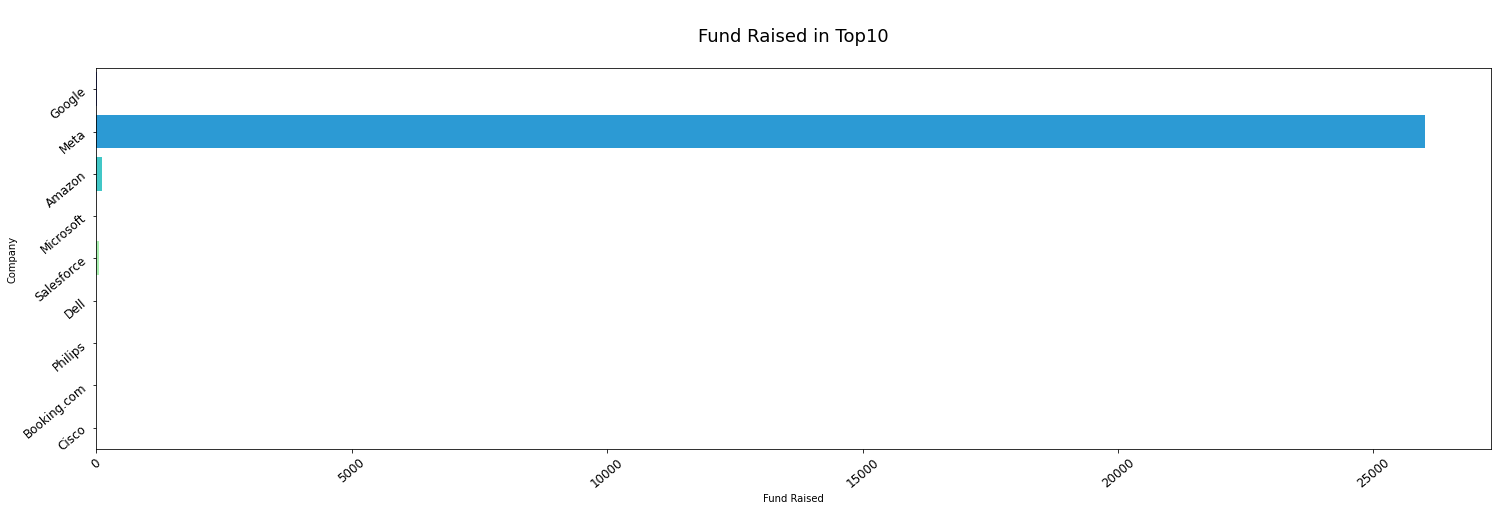

In [160]:
plt.figure(figsize=(25,7))

sns.barplot(data=top10_comp, y=top10_comp['Company'], x=top10_comp['Funds_Raised'].astype(str).astype(float), palette=palette)
plt.ylabel('Company'), plt.xlabel('Fund Raised')
plt.xticks(rotation=40, fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nFund Raised in Top10\n", fontsize=18)

plt.show()

<br><br><br>
<a id="conclusion"></a>
<div style="background:#4AD3FF; color:#000; padding: 20px; text-align:center">Thankyou! For viewing this Notebook, do upvote if you liked it. Please feel free to provide any feedback!… 😄</div>